In [79]:
## need to consider at what temperature carbon veiling becomes a problem

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib
plt.rcParams['font.family'] = "Times New Roman"
from scipy.ndimage.filters import gaussian_filter
%matplotlib notebook

In [16]:
def Dwarf_Logg(TEMP):
    if TEMP < 5000.:
        return -0.0001489 *TEMP + 5.603
    
    else:
        return -6.824e-11 * np.power(TEMP, 3) + 1.003e-06 *np.power(TEMP, 2) - 0.005087 *TEMP + 13.73
    
    
def Giant_Logg(TEMP):
    return -2.2e-08 * np.power(TEMP, 2) + 0.00294 * TEMP - 12.17

In [17]:
print(Dwarf_Logg(5500))
print(Giant_Logg(5500))


4.73882
3.3345


Here's the breakdown of temperatures and $\log{g}$


|T$_{\rm eff}$ | 4000  | 4250 | 4500 | 4750 | 5000 | 5250 | 5500 |
|:-------     :|-------|------|------|------|------|------|------|
| Dwarf log(g) |   5   | 4.97 | 4.93 | 4.90 | 4.84 | 4.79 | 4.73 |
| Giant log(g) | -0.75 | 0    | 0.61 | 1.29 | 1.98 | 2.65 | 3.33 |




|           | A(C)  | [Fe/H] | [C/Fe] |
|:-------:|-------|------|------|
| Group I   |  7.96 |  -2.5  |   2    |
| Group II  |  6    |  -3.5  |  1.07  |
| Group III |  6.8  |  -4.5    |  2.87  |




In [3]:
def cfe(ac, feh):
    return ac - feh - 8.43 

In [4]:
cfe(6.8, -4.5)

2.870000000000001

In [18]:
t_range = np.linspace(4000, 5500, 7)
d_range = [Dwarf_Logg(teff) for teff in t_range]
g_range = [Giant_Logg(teff) for teff in t_range]


In [19]:
### Group I

giant_out = open("GI_giant.dat", "w+")
dwarf_out = open("GI_dwarf.dat", "w+")

for t, dwarf_g, giant_g in zip(t_range, d_range, g_range):
    giant_out.write("%.2f" % t + "," + "%.2f" % giant_g + ",-2.5,2.0\n") 
    dwarf_out.write("%.2f" % t + "," + "%.2f" % dwarf_g + ",-2.5,2.0\n")
    

giant_out.close()
dwarf_out.close()

### Group II
giant_out = open("G2_giant.dat", "w+")
dwarf_out = open("G2_dwarf.dat", "w+")

for t, dwarf_g, giant_g in zip(t_range, d_range, g_range):
    giant_out.write("%.2f" % t + "," + "%.2f" % giant_g + ",-3.5,1.07\n") 
    dwarf_out.write("%.2f" % t + "," + "%.2f" % dwarf_g + ",-3.5,1.07\n")


### Group III
giant_out = open("G3_giant.dat", "w+")
dwarf_out = open("G3_dwarf.dat", "w+")

for t, dwarf_g, giant_g in zip(t_range, d_range, g_range):
    giant_out.write("%.2f" % t + "," + "%.2f" % giant_g + ",-4.5,2.87\n") 
    dwarf_out.write("%.2f" % t + "," + "%.2f" % dwarf_g + ",-4.5,2.87\n")

giant_out.close()
dwarf_out.close()  

### GROUP I

In [111]:
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GI/"
dwarf_array = [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

print(os.listdir(dwarf_path))

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GI/"
giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]


['T4000g5.00z-2.50c+2.00.dat', 'T4250g5.00z-2.50c+2.00.dat', 'T4500g5.00z-2.50c+2.00.dat', 'T4750g5.00z-2.50c+2.00.dat', 'T5000g5.00z-2.50c+2.00.dat', 'T5250g5.00z-2.50c+2.00.dat', 'T5500g5.00z-2.50c+2.00.dat']


<IPython.core.display.Javascript object>


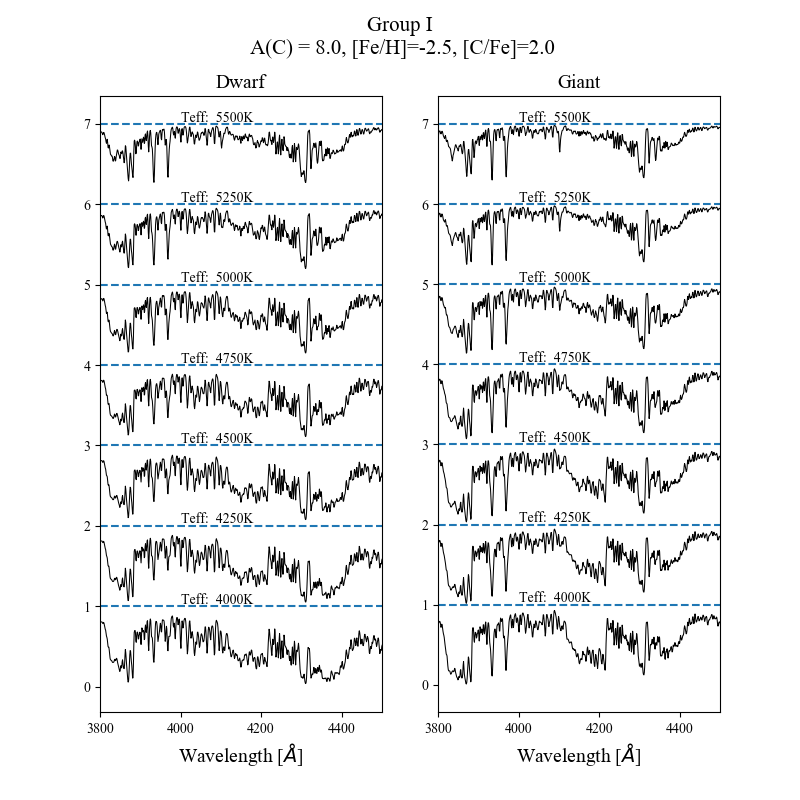

In [112]:
fig,ax = plt.subplots(1,2, figsize=(8,8))
[ax[0].plot(spec[0], spec[1] + i, linewidth=0.75, color="black") for i, spec in enumerate(dwarf_array)]
[ax[1].plot(spec[0], spec[1] + i, linewidth=0.75, color="black") for i, spec in enumerate(giant_array)]

#### dwarf
[ax[0].text(4000, i+1.03, "Teff:  "+name.split("T")[1].split("g")[0] + "K") for i, name in enumerate(os.listdir(dwarf_path))]
#### giant
[ax[1].text(4000, i+1.03, "Teff:  "+name.split("T")[1].split("g")[0] + "K") for i, name in enumerate(os.listdir(giant_path))]

fig.suptitle("Group I\n A(C) = 8.0, [Fe/H]=-2.5, [C/Fe]=2.0", fontsize=15)
ax[0].set_title("Dwarf", fontsize=14)
ax[1].set_title("Giant", fontsize=14)

[label.set_xlabel(r"Wavelength [$\AA$]", fontsize=14) for label in ax]
[[label.axhline(i+1, linestyle="--") for label in ax] for i in range(len(giant_array))]

[label.set_xlim([3800, 4500]) for label in ax]

plt.savefig("plots/GI_veiling.pdf", format="pdf")

In [27]:
print(os.listdir(dwarf_path))
print(os.listdir(giant_path))

['T4000g5.00z-2.50c+2.00.dat', 'T4250g5.00z-2.50c+2.00.dat', 'T4500g5.00z-2.50c+2.00.dat', 'T4750g5.00z-2.50c+2.00.dat', 'T5000g5.00z-2.50c+2.00.dat', 'T5250g5.00z-2.50c+2.00.dat', 'T5500g5.00z-2.50c+2.00.dat']
['T4000g0.00z-2.50c+2.00.dat', 'T4250g0.00z-2.50c+2.00.dat', 'T4500g0.50z-2.50c+2.00.dat', 'T4750g1.50z-2.50c+2.00.dat', 'T5000g2.00z-2.50c+2.00.dat', 'T5250g2.50z-2.50c+2.00.dat', 'T5500g3.50z-2.50c+2.00.dat']


#### Group II

In [117]:
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GII/"
dwarf_array = [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

print(os.listdir(dwarf_path))

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GII/"
giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]


['T4000g5.00z-3.50c+1.00.dat', 'T4250g5.00z-3.50c+1.00.dat', 'T4500g5.00z-3.50c+1.00.dat', 'T4750g5.00z-3.50c+1.00.dat', 'T5000g5.00z-3.50c+1.00.dat', 'T5250g5.00z-3.50c+1.00.dat', 'T5500g5.00z-3.50c+1.00.dat']


<IPython.core.display.Javascript object>


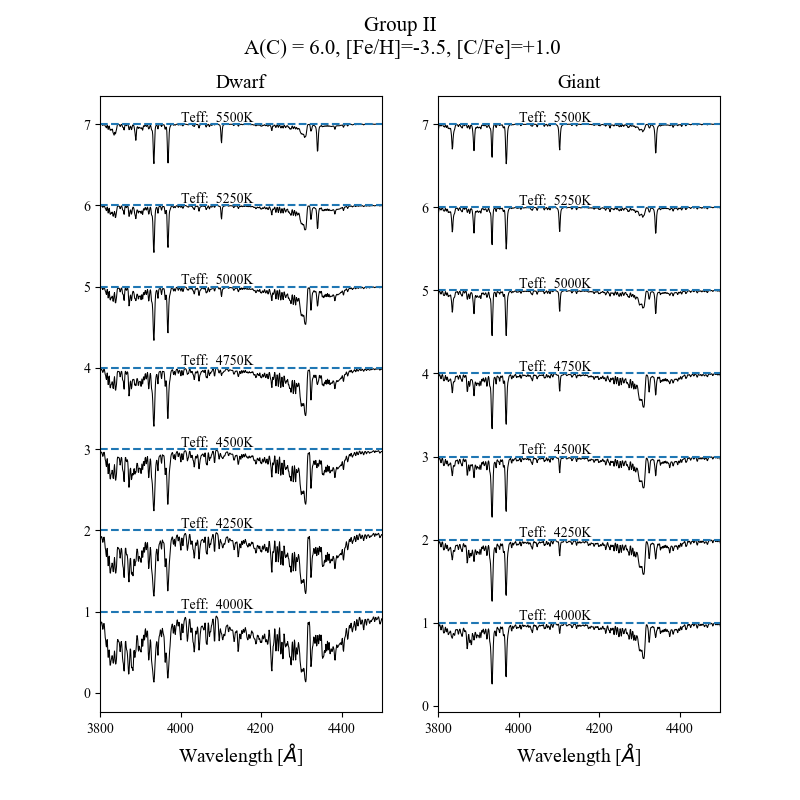

In [118]:
fig,ax = plt.subplots(1,2, figsize=(8,8))
[ax[0].plot(spec[0], spec[1] + i, linewidth=0.75, color="black") for i, spec in enumerate(dwarf_array)]
[ax[1].plot(spec[0], spec[1] + i, linewidth=0.75, color="black") for i, spec in enumerate(giant_array)]

#### dwarf
[ax[0].text(4000, i+1.03, "Teff:  "+name.split("T")[1].split("g")[0] + "K") for i, name in enumerate(os.listdir(dwarf_path))]
#### giant
[ax[1].text(4000, i+1.03, "Teff:  "+name.split("T")[1].split("g")[0] + "K") for i, name in enumerate(os.listdir(giant_path))]

fig.suptitle("Group II\n A(C) = 6.0, [Fe/H]=-3.5, [C/Fe]=+1.0", fontsize=15)
ax[0].set_title("Dwarf", fontsize=14)
ax[1].set_title("Giant", fontsize=14)

[label.set_xlabel(r"Wavelength [$\AA$]", fontsize=14) for label in ax]
[[label.axhline(i+1, linestyle="--") for label in ax] for i in range(len(giant_array))]

[label.set_xlim([3800, 4500]) for label in ax]
plt.savefig("plots/GII_veiling.pdf", format="pdf")

### Group III

In [119]:
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GIII/"
dwarf_array = [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

print(os.listdir(dwarf_path))

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GIII/"
giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]


['T4000g5.00z-4.50c+2.75.dat', 'T4250g5.00z-4.50c+2.75.dat', 'T4500g5.00z-4.50c+2.75.dat', 'T4750g5.00z-4.50c+2.75.dat', 'T5000g5.00z-4.50c+2.75.dat', 'T5250g5.00z-4.50c+2.75.dat', 'T5500g5.00z-4.50c+2.75.dat']


<IPython.core.display.Javascript object>


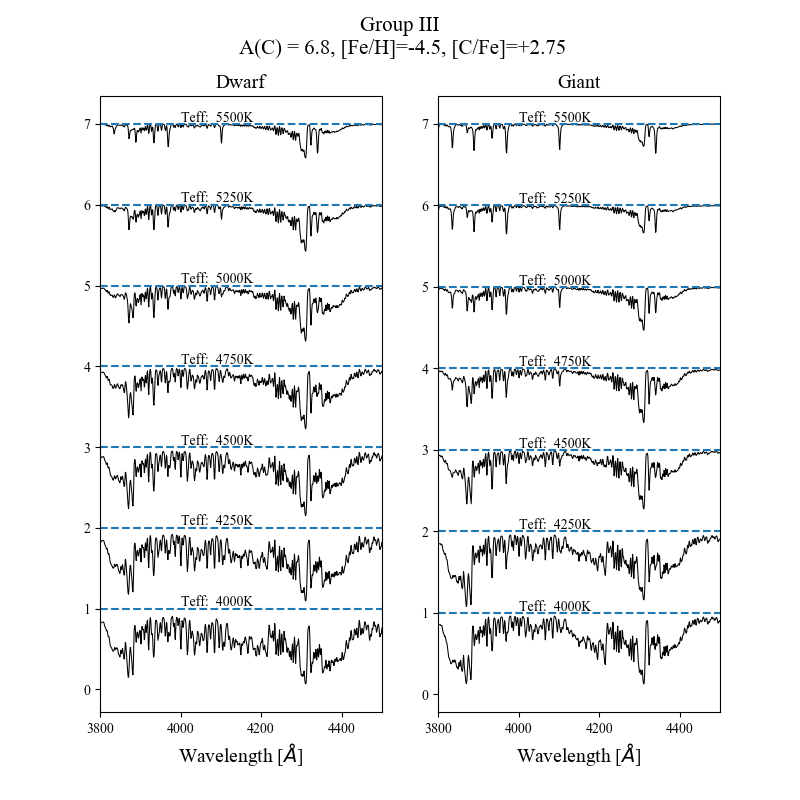

In [120]:
fig,ax = plt.subplots(1,2, figsize=(8,8))
[ax[0].plot(spec[0], spec[1] + i, linewidth=0.75, color="black") for i, spec in enumerate(dwarf_array)]
[ax[1].plot(spec[0], spec[1] + i, linewidth=0.75, color="black") for i, spec in enumerate(giant_array)]

#### dwarf
[ax[0].text(4000, i+1.03, "Teff:  "+name.split("T")[1].split("g")[0] + "K") for i, name in enumerate(os.listdir(dwarf_path))]
#### giant
[ax[1].text(4000, i+1.03, "Teff:  "+name.split("T")[1].split("g")[0] + "K") for i, name in enumerate(os.listdir(giant_path))]

fig.suptitle("Group III\n A(C) = 6.8, [Fe/H]=-4.5, [C/Fe]=+2.75", fontsize=15)
ax[0].set_title("Dwarf", fontsize=14)
ax[1].set_title("Giant", fontsize=14)

[label.set_xlabel(r"Wavelength [$\AA$]", fontsize=14) for label in ax]
[[label.axhline(i+1, linestyle="--") for label in ax] for i in range(len(giant_array))]

[label.set_xlim([3800, 4500]) for label in ax]
plt.savefig("plots/GIII_veiling.pdf", format="pdf")

#### Combine and Smooth

<IPython.core.display.Javascript object>


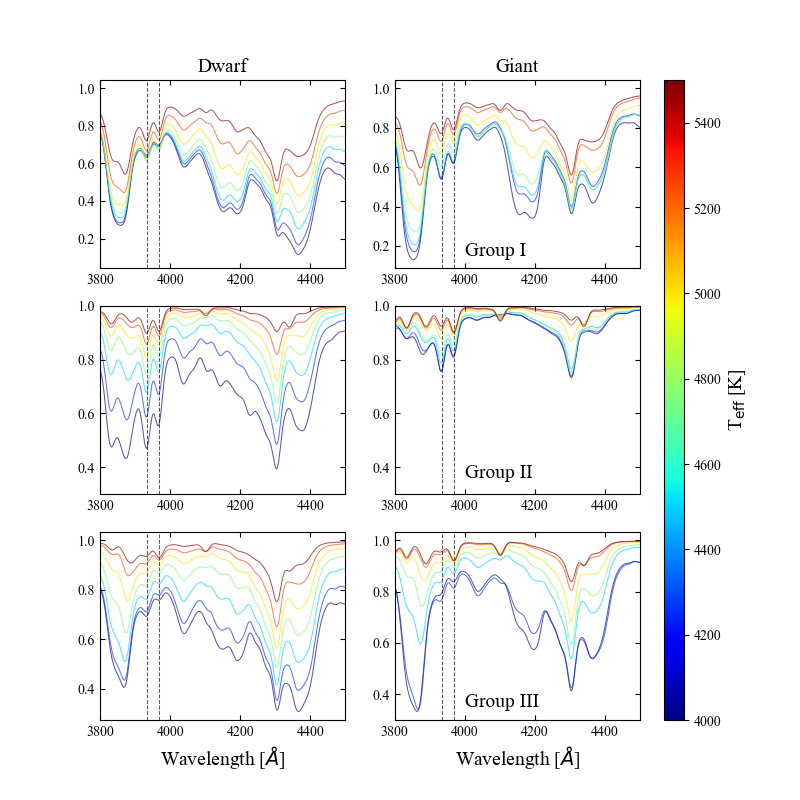

In [121]:
fig, ax = plt.subplots(3,2, figsize=(8,8))

ax[0,0].set_title("Dwarf", fontsize=14)
ax[0,1].set_title("Giant", fontsize=14)
color_array = plt.cm.jet(np.linspace(0,1,7))
sigmaset=10


#Group I
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GI/"
dwarf_array = [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GI/"
giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]
ax[0,0].text
[ax[0,0].plot(spec[0], gaussian_filter(spec[1], sigma=sigmaset), linewidth=0.75, color=color_array[i], alpha=0.65) for i, spec in enumerate(dwarf_array)]
[ax[0,1].plot(spec[0], gaussian_filter(spec[1], sigma=sigmaset), linewidth=0.75, color=color_array[i], alpha=0.65) for i, spec in enumerate(giant_array)]


#Group II
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GII/"
dwarf_array = [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GII/"
giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]

[ax[1,0].plot(spec[0], gaussian_filter(spec[1], sigma=sigmaset), linewidth=0.75, color=color_array[i], alpha=0.65) for i, spec in enumerate(dwarf_array)]
[ax[1,1].plot(spec[0], gaussian_filter(spec[1], sigma=sigmaset), linewidth=0.75, color=color_array[i], alpha=0.65) for i, spec in enumerate(giant_array)]




#Group III
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GIII/"
dwarf_array = [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GIII/"
giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]

[ax[2,0].plot(spec[0], gaussian_filter(spec[1], sigma=sigmaset), linewidth=0.75, color=color_array[i], alpha=0.65) for i, spec in enumerate(dwarf_array)]
[ax[2,1].plot(spec[0], gaussian_filter(spec[1], sigma=sigmaset), linewidth=0.75, color=color_array[i], alpha=0.65) for i, spec in enumerate(giant_array)]

ax[0,1].text(4000, 0.15,"Group I", fontsize=14)
ax[1,1].text(4000, 0.36,"Group II", fontsize=14)
ax[2,1].text(4000, 0.35,"Group III", fontsize=14)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)


cax = plt.axes([0.83, 0.1, 0.025, 0.8])
norm = matplotlib.colors.Normalize(vmin=4000, vmax=5500)
#plt.colorbar(cax=cax)

cb1 = matplotlib.colorbar.ColorbarBase(cax, cmap=plt.cm.jet,
                                norm=norm,
                                orientation='vertical')
cb1.set_label(r"T$_{\rm eff}$ [K]", fontsize=14)

[label.axvline(3969, linestyle="--", color="black", alpha=0.65, linewidth=0.75) for label in ax[:,0]]
[label.axvline(3969, linestyle="--", color="black", alpha=0.65, linewidth=0.75) for label in ax[:,1]]

[label.axvline(3934, linestyle="--", color="black", alpha=0.65, linewidth=0.75) for label in ax[:,0]]
[label.axvline(3934, linestyle="--", color="black", alpha=0.65, linewidth=0.75) for label in ax[:,1]]


[label.tick_params(direction="in", top=True, right=True) for label in ax[:,0]]
[label.tick_params(direction="in", top=True, right=True) for label in ax[:,1]]


[label.set_ylim([0.3, 1.]) for label in ax[1,:]]
#[label.set_ylim([0.1, 1.]) for label in ax[:,1]]

[label.set_xlim([3800, 4500]) for label in ax[:,0]]
[label.set_xlim([3800, 4500]) for label in ax[:,1]]
[label.set_xlabel(r"Wavelength [$\AA$]", fontsize=14) for label in ax[2,:]]

plt.show()
plt.savefig("plots/carbon_veiling_smoothed.pdf", format="pdf")

In [122]:


#Group I
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GI/"
GI_dwarf_array= [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GI/"
GI_giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]


#Group II
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GII/"
GII_dwarf_array = [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GII/"
GII_giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]


#Group III
dwarf_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/dwarf/GIII/"
GIII_dwarf_array = [pd.read_csv(dwarf_path + item, header=None, sep="\s+") for item in os.listdir(dwarf_path)]

giant_path = "/Users/MasterD/Google Drive/Yoon_UMP/synthetic/giant/GIII/"
GIII_giant_array = [pd.read_csv(giant_path + item, header=None, sep="\s+") for item in os.listdir(giant_path)]



In [148]:
def MAD(input_vector):
    return np.median(np.abs(input_vector - np.median(input_vector)))

In [183]:
#for i in range(len(GI_dwarf_array)):
sigmaset=50

DI_DIFF = [np.median(gaussian_filter(GI_dwarf_array[i][GI_dwarf_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GI_dwarf_array[-1][GI_dwarf_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GI_dwarf_array))]
DI_SPREAD = [MAD(gaussian_filter(GI_dwarf_array[i][GI_dwarf_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GI_dwarf_array[-1][GI_dwarf_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GI_dwarf_array))]

GI_DIFF = [np.median(gaussian_filter(GI_giant_array[i][GI_giant_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GI_giant_array[-1][GI_giant_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GI_giant_array))]
GI_SPREAD = [MAD(gaussian_filter(GI_giant_array[i][GI_giant_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GI_giant_array[-1][GI_giant_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GI_giant_array))]

DII_DIFF = [np.median(gaussian_filter(GII_dwarf_array[i][GII_dwarf_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GII_dwarf_array[-1][GII_dwarf_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GII_dwarf_array))]
DII_SPREAD = [MAD(gaussian_filter(GII_dwarf_array[i][GII_dwarf_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GII_dwarf_array[-1][GII_dwarf_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GII_dwarf_array))]

GII_DIFF = [np.median(gaussian_filter(GII_giant_array[i][GII_giant_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GII_giant_array[-1][GII_giant_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GII_giant_array))]
GII_SPREAD = [MAD(gaussian_filter(GII_giant_array[i][GII_giant_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GII_giant_array[-1][GII_giant_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GII_giant_array))]


DIII_DIFF = [np.median(gaussian_filter(GIII_dwarf_array[i][GIII_dwarf_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GIII_dwarf_array[-1][GIII_dwarf_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GIII_dwarf_array))]
DIII_SPREAD = [MAD(gaussian_filter(GIII_dwarf_array[i][GIII_dwarf_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GIII_dwarf_array[-1][GIII_dwarf_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GIII_dwarf_array))]


GIII_DIFF = [np.median(gaussian_filter(GIII_giant_array[i][GIII_giant_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GIII_giant_array[-1][GIII_giant_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GIII_giant_array))]
GIII_SPREAD = [MAD(gaussian_filter(GIII_giant_array[i][GIII_giant_array[i][0].between(3800, 4500, inclusive=True)][1], sigma=sigmaset) - gaussian_filter(GIII_giant_array[-1][GIII_giant_array[-1][0].between(3800, 4500, inclusive=True)][1], sigma=10)) for i in range(len(GIII_giant_array))]

<IPython.core.display.Javascript object>


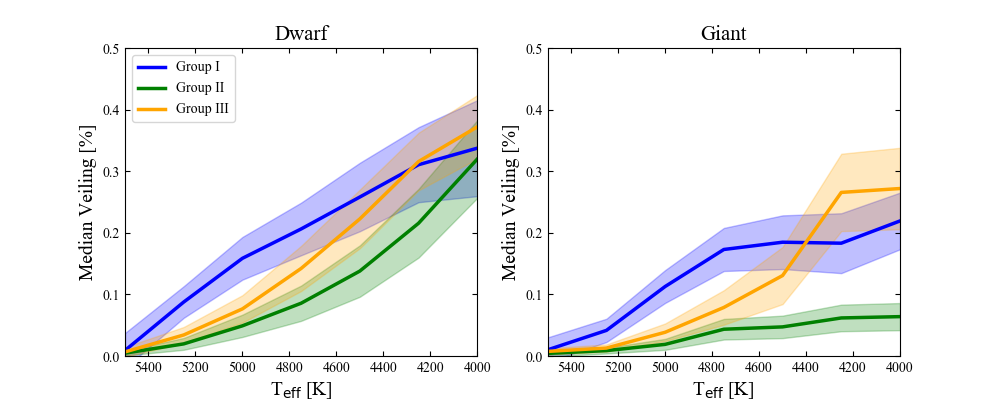

In [184]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
t_span = np.linspace(4000, 5500, 7)
ax[0].plot(np.linspace(4000, 5500, 7), -1*np.array(DI_DIFF), color="blue", linewidth=2.5, label="Group I")
ax[0].fill_between(t_span, -1*np.array(DI_DIFF) -DI_SPREAD, -1*np.array(DI_DIFF) +DI_SPREAD, color="blue", alpha=0.25)

ax[1].plot(np.linspace(4000, 5500, 7), -1*np.array(GI_DIFF), color="blue", linewidth=2.5)
ax[1].fill_between(t_span, -1*np.array(GI_DIFF) -GI_SPREAD, -1*np.array(GI_DIFF) +GI_SPREAD, color="blue", alpha=0.25)


ax[0].plot(np.linspace(4000, 5500, 7), -1*np.array(DII_DIFF), color="green", linewidth=2.5, label="Group II")
ax[0].fill_between(t_span, -1*np.array(DII_DIFF) -DII_SPREAD, -1*np.array(DII_DIFF) +DII_SPREAD, color="green", alpha=0.25)


ax[1].plot(np.linspace(4000, 5500, 7), -1*np.array(GII_DIFF), color="green", linewidth=2.5)
ax[1].fill_between(t_span, -1*np.array(GII_DIFF) -GII_SPREAD, -1*np.array(GII_DIFF) +GII_SPREAD, color="green", alpha=0.25)

ax[0].plot(np.linspace(4000, 5500, 7), -1*np.array(DIII_DIFF), color="orange", linewidth=2.5, label='Group III')
ax[0].fill_between(t_span, -1*np.array(DIII_DIFF) -DIII_SPREAD, -1*np.array(DIII_DIFF) +DIII_SPREAD, color="orange", alpha=0.25)

ax[1].plot(np.linspace(4000, 5500, 7), -1*np.array(GIII_DIFF), color="orange", linewidth=2.5)
ax[1].fill_between(t_span, -1*np.array(GIII_DIFF) -GIII_SPREAD, -1*np.array(GIII_DIFF) +GIII_SPREAD, color="orange", alpha=0.25)

ax[0].legend(loc=2)
[label.set_xlabel(r"T$_{\rm eff}$ [K]", fontsize=14) for label in ax]
[label.set_ylabel(r"Median Veiling [%]", fontsize=14) for label in ax]

[label.set_xlim([5500,4000]) for label in ax]
[label.set_ylim([0,0.5]) for label in ax]
[label.tick_params(direction="in", top=True, right=True) for label in ax]

ax[0].set_title("Dwarf", fontsize=15)
ax[1].set_title("Giant", fontsize=15)

plt.show()
#plt.savefig("plots/relative_deviation.pdf", format="pdf")